### INSTALLING AND IMPORTING LIBRARIES


In [1]:
import praw
import os
import pandas as pd
import datetime as dt
import logging
import numpy as np
from numpy import random
import gensim
import nltk
nltk.download('all')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_dat

[nltk_data]    |   Package pil is already up-to-date!
[nltk_data]    | Downloading package pl196x to C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pl196x is already up-to-date!
[nltk_data]    | Downloading package ppattach to C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ppattach is already up-to-date!
[nltk_data]    | Downloading package problem_reports to
[nltk_data]    |     C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package problem_reports is already up-to-date!
[nltk_data]    | Downloading package propbank to C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package propbank is already up-to-date!
[nltk_data]    | Downloading package ptb to C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ptb is already up-to-date!
[nltk_data

[nltk_data]    |   Package bllip_wsj_no_aux is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\AVANISH
[nltk_data]    |     SINGHAL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perc

### SCRAPPING OF R/INDIA POSTS USING PRAW

## Why I did this?
To scrape the data from the reddit.

In [2]:
reddit = praw.Reddit(client_id='69D-_faFMb67Ww', client_secret='NicR7Ux1OFwOTuN1QDn49wq6itM',username='singhalavanish',password='cookies12', user_agent='singhalavanish')

### DEFINING TYPES OF FLAIR

In [3]:
flairs = ["AskIndia", "Non-Political", "[R]eddiquette", "Scheduled", "Photography", "Science/Technology", "Politics", "Business/Finance", "Policy/Economy", "Sports", "Food", "AMA","Coronavirus"]
len(flairs)

13

### DICTIONARY OF FLAIRS

In [4]:
flair_dict={0:'Political',1:'Non-Political',2:'[R]eddiquette',3:'AskIndia',4:'Science/Technology',5:'Policy/Economy',6:'Finance/Business',7:'Sports',8:'Food',9:'Photography',10:'AMA',11:'Coronavirus'}

### RETRIEVING 1000 MOST UPVOTED  POSTS FROM R/INDIA PAGE

## Why I did this?
To scrape the top 1000 post which are most upvoted

In [5]:
subreddit = reddit.subreddit('india')
posts = subreddit.hot(limit=1000)


In [6]:
posts

### DEFINING THE FUNCTIONS FOR PRE-PROCESSING OF TEXT

## why I did this?
Here,I have defined the function to preprocess a text. I have achieved it by doing converting the scraped title and url and clean it by using regex function.Here we have converted the string to lower case because While dealing with strings we ahve to convert it into lower and finding the pattern and then join them to make a complete sentence.

In [7]:
#REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
#BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
#STOPWORDS = set(stopwords.words('english'))
def string_form(value):
    return str(value)

def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

### DICTIONARY REPRESENTING KEY WITH EMPLTY LIST

## Why I did this?
Here I have declared an empty list respective to keys and Why I have done this because after cleaning the scraped data we have appended each value to respective keys.

In [8]:
topics_dict = { "title":[], 
                "score":[],
                "flair":[],
                "author":[],
                "id":[], "url":[], 
                "comms_num": [], 
                "created": [], 
                "body":[]}

### APPENDING THE VALUES INTO RESPECTIVE KEYS WHICH ARE RETIREVED 

## Why I did this?
Here we have appended the data to the list we have created in our dictionary

In [9]:
for submission in posts:
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["flair"].append(submission.link_flair_text)
    topics_dict["author"].append(submission.author)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)

In [10]:
topics_data = pd.DataFrame(topics_dict)


### ASSIGNING THE DATE AND TIME OF POST

In [11]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)
_timestamp = topics_data["created"].apply(get_date)
topics_data = topics_data.assign(timestamp = _timestamp)

In [12]:
topics_data

,title,score,flair,author,id,url,comms_num,created,body,timestamp
0,Coronavirus (COVID-19) Megathread - News and U...,395,Coronavirus,IAmMohit,fqqdsg,https://www.reddit.com/r/india/comments/fqqdsg...,10106,1.585451e+09,###[Covid-19 Fundraisers & Donation Links](htt...,2020-03-29 08:40:33
1,A comprehensive look at Covid Surveillance and...,133,Policy/Economy,InternetFreedomIn,g0f72k,https://www.reddit.com/r/india/comments/g0f72k...,11,1.586797e+09,https://preview.redd.it/5vdy8f5stjs41.png?widt...,2020-04-13 22:20:44
2,"Today on the first day of Bengali calendar, wi...",863,Non-Political,sarcrastinator,g0xyg7,https://i.imgur.com/wTH4IsY.jpg,52,1.586864e+09,,2020-04-14 16:57:21
3,Breaking: National Lockdown extended May-3,367,Politics,Neglectedsince1994,g0z3a8,https://twitter.com/LiveLawIndia/status/124992...,204,1.586868e+09,,2020-04-14 18:15:48
4,Key takeaways from PM Narendra Modi’s address ...,253,Coronavirus,AvneeshMishra,g0zink,https://www.reddit.com/r/india/comments/g0zink...,64,1.586870e+09,"## Key points said\n- Nation's fighting well, ...",2020-04-14 18:49:38
5,Anyone knows the OP of this gem? Some picture ...,1508,Non-Political,suvansharma01,g0p9pd,https://i.redd.it/inkpt9yaums41.jpg,38,1.586833e+09,,2020-04-14 08:28:58
6,Women gather together during Dust storm in Raj...,3357,Photography,TheDosaMan,g0jntt,https://i.redd.it/uapdc9dvels41.png,65,1.586816e+09,,2020-04-14 03:40:36
7,Mother's condition is going worse due to hepat...,164,AskIndia,sanand_satwik,g0zlly,https://www.reddit.com/r/india/comments/g0zlly...,25,1.586871e+09,"Hi folks, I really appreciate the warm respons...",2020-04-14 18:56:11
8,Indian Army Trooper somewhere in the Kashmir V...,96,Non-Political,OpHind,g10ndj,https://i.redd.it/qqnvs3ejdqs41.jpg,10,1.586876e+09,,2020-04-14 20:21:11
9,Bloodbath amid lockdown: TOI's Sunday Magazine...,101,Business/Finance,pammoth,g0yon8,https://www.freepressjournal.in/india/bloodbat...,21,1.586867e+09,,2020-04-14 17:47:16


### CONVERTING THE DATAFRAME TO CSV FILE

In [21]:
topics_data.to_csv('../Data/redscrape.csv', index=False) 


### READING CSV FILE WITH PANDAS LIBRARY

In [22]:
df = pd.read_csv("../Data/redscrape.csv")

### TEXT PREPROCESSING AND ASSIGNING VALUE TO NEW COLUMN

In [23]:
df['title'] = df['title'].apply(string_form)
df['body'] = df['body'].apply(string_form)
#df['url'] = df['url'].apply(string_form)

df['title'] = df['title'].apply(clean_text)
df['body'] = df['body'].apply(clean_text)
#df['url'] = df['url'].apply(clean_text)

feature_combine = df["title"] + df["url"]
df = df.assign(feature_combine = feature_combine)

In [24]:
df.head()

,title,score,flair,author,id,url,comms_num,created,body,timestamp,feature_combine
0,coronavirus covid megathread news and updates,395,Coronavirus,IAmMohit,fqqdsg,https://www.reddit.com/r/india/comments/fqqdsg...,10106,1.585451e+09,covid fundraisers donation links https amnesty...,2020-03-29 08:40:33,coronavirus covid megathread news and updatesh...
1,a comprehensive look at covid surveillance and...,133,Policy/Economy,InternetFreedomIn,g0f72k,https://www.reddit.com/r/india/comments/g0f72k...,11,1.586797e+09,https preview redd it vdy f stjs png width for...,2020-04-13 22:20:44,a comprehensive look at covid surveillance and...
2,today on the first day of bengali calendar wis...,863,Non-Political,sarcrastinator,g0xyg7,https://i.imgur.com/wTH4IsY.jpg,52,1.586864e+09,nan,2020-04-14 16:57:21,today on the first day of bengali calendar wis...
3,breaking national lockdown extended may,367,Politics,Neglectedsince1994,g0z3a8,https://twitter.com/LiveLawIndia/status/124992...,204,1.586868e+09,nan,2020-04-14 18:15:48,breaking national lockdown extended mayhttps:/...
4,key takeaways from pm narendra modi s address ...,253,Coronavirus,AvneeshMishra,g0zink,https://www.reddit.com/r/india/comments/g0zink...,64,1.586870e+09,key points said nations fighting well thanks t...,2020-04-14 18:49:38,key takeaways from pm narendra modi s address ...


### GETTING NUMBER OF ROWS IN EACH COLUMN

## Need?
To know the number of rows each column hold.


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 11 columns):
title              788 non-null object
score              788 non-null int64
flair              773 non-null object
author             785 non-null object
id                 788 non-null object
url                788 non-null object
comms_num          788 non-null int64
created            788 non-null float64
body               788 non-null object
timestamp          788 non-null object
feature_combine    788 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 67.8+ KB


### ANALYSIS OF DATAFRAME 


## Why?
Stats are very imortant for every data so to know the total analysis of data.

In [26]:
df.describe()

,score,comms_num,created
count,788.000000,788.000000,7.880000e+02
mean,138.423858,44.616751,1.586718e+09
std,540.372960,397.719376,1.179421e+05
min,0.000000,0.000000,1.585451e+09
25%,10.000000,1.000000,1.586644e+09
50%,23.000000,5.000000,1.586721e+09
75%,74.000000,16.250000,1.586803e+09
max,9806.000000,10106.000000,1.586882e+09


### REMOVING/DROPPING THE NAN ROWS IN FLAIR COLUMN

## Why?
Here we are droopping the rows which have nan as value in the column name flair.It will help the model to predict accurately.

In [27]:
df = df[df['flair'].notna()]
df

,title,score,flair,author,id,url,comms_num,created,body,timestamp,feature_combine
0,coronavirus covid megathread news and updates,395,Coronavirus,IAmMohit,fqqdsg,https://www.reddit.com/r/india/comments/fqqdsg...,10106,1.585451e+09,covid fundraisers donation links https amnesty...,2020-03-29 08:40:33,coronavirus covid megathread news and updatesh...
1,a comprehensive look at covid surveillance and...,133,Policy/Economy,InternetFreedomIn,g0f72k,https://www.reddit.com/r/india/comments/g0f72k...,11,1.586797e+09,https preview redd it vdy f stjs png width for...,2020-04-13 22:20:44,a comprehensive look at covid surveillance and...
2,today on the first day of bengali calendar wis...,863,Non-Political,sarcrastinator,g0xyg7,https://i.imgur.com/wTH4IsY.jpg,52,1.586864e+09,nan,2020-04-14 16:57:21,today on the first day of bengali calendar wis...
3,breaking national lockdown extended may,367,Politics,Neglectedsince1994,g0z3a8,https://twitter.com/LiveLawIndia/status/124992...,204,1.586868e+09,nan,2020-04-14 18:15:48,breaking national lockdown extended mayhttps:/...
4,key takeaways from pm narendra modi s address ...,253,Coronavirus,AvneeshMishra,g0zink,https://www.reddit.com/r/india/comments/g0zink...,64,1.586870e+09,key points said nations fighting well thanks t...,2020-04-14 18:49:38,key takeaways from pm narendra modi s address ...
5,anyone knows the op of this gem some picture c...,1508,Non-Political,suvansharma01,g0p9pd,https://i.redd.it/inkpt9yaums41.jpg,38,1.586833e+09,nan,2020-04-14 08:28:58,anyone knows the op of this gem some picture c...
6,women gather together during dust storm in raj...,3357,Photography,TheDosaMan,g0jntt,https://i.redd.it/uapdc9dvels41.png,65,1.586816e+09,nan,2020-04-14 03:40:36,women gather together during dust storm in raj...
7,mothers condition is going worse due to hepati...,164,AskIndia,sanand_satwik,g0zlly,https://www.reddit.com/r/india/comments/g0zlly...,25,1.586871e+09,hi folks i really appreciate the warm response...,2020-04-14 18:56:11,mothers condition is going worse due to hepati...
8,indian army trooper somewhere in the kashmir v...,96,Non-Political,OpHind,g10ndj,https://i.redd.it/qqnvs3ejdqs41.jpg,10,1.586876e+09,nan,2020-04-14 20:21:11,indian army trooper somewhere in the kashmir v...
9,bloodbath amid lockdown tois sunday magazine n...,101,Business/Finance,pammoth,g0yon8,https://www.freepressjournal.in/india/bloodbat...,21,1.586867e+09,nan,2020-04-14 17:47:16,bloodbath amid lockdown tois sunday magazine n...


### FINDING THE CORRELATION BETWEEN THE INPUT FACTORS IN DATAFRAME

## Why?
I have tried this to know the important kinput factors which will help as features.

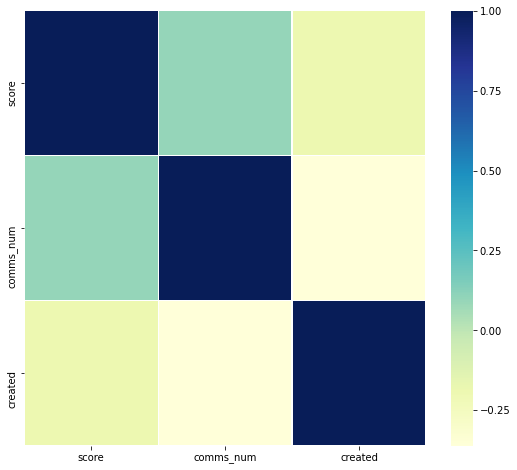

In [28]:
import seaborn as sns 

corrmat = df.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

### EXTRACTING THE UNIQUES FLAIRS DEFINED IN DATAFRAME

In [29]:
uniqueflair = df['flair'].unique()
uniqueflair


array(['Coronavirus', 'Policy/Economy', 'Non-Political', 'Politics',
       'Photography', 'AskIndia', 'Business/Finance', 'Food',
       'Science/Technology', 'Scheduled', 'Unverified',
       'Translation provided in comments', '| Repost |', 'Announcement',
       '| Image Rule Violation |', 'CAA-NRC-NPR', 'Unverified - Opinion',
       'Sports'], dtype=object)

### Detecting Outliers

## Why?
I have done this to know which value of score column is not needed, and where the most of the value lies.

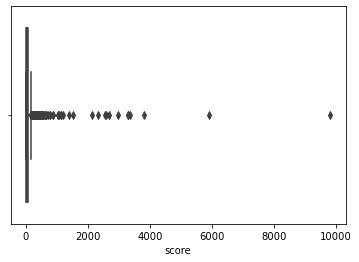

In [30]:
sns.boxplot(x=df['score'])

### VISUALISATION OF FLAIR WITH NUMBER OF POSTS

## Need?
It is done so, a developer know how many post are posted under each flair on this particular page. It will help in jif we are using weights.

Text(0.5, 0, 'flairs')

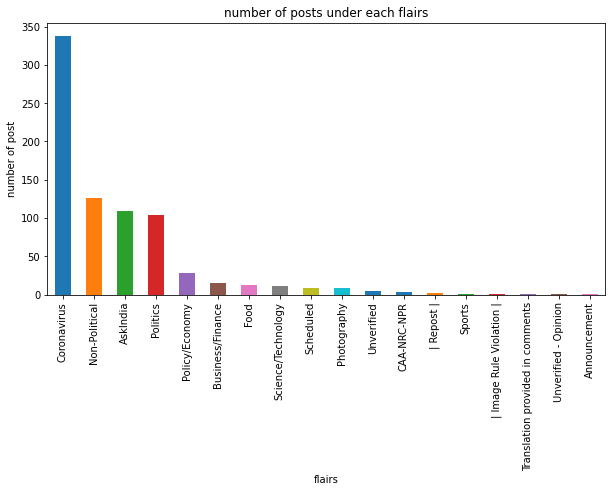

In [31]:
df.flair.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("number of posts under each flairs")
plt.ylabel("number of post")
plt.xlabel("flairs")

### APPENDING UNIQUE FLAIR IN LIST

In [32]:
flairlist = list(df['flair'].unique())
flairlist

['Coronavirus',
 'Policy/Economy',
 'Non-Political',
 'Politics',
 'Photography',
 'AskIndia',
 'Business/Finance',
 'Food',
 'Science/Technology',
 'Scheduled',
 'Unverified',
 'Translation provided in comments',
 '| Repost |',
 'Announcement',
 '| Image Rule Violation |',
 'CAA-NRC-NPR',
 'Unverified - Opinion',
 'Sports']

### EACH FLAIR DESCRIPTION

## Need?
It is needed, so as to know what are stats of each flair.

In [33]:
for t in flairlist:
    for i in range(1):
        i = df.loc[df['flair'] == t]
        print(t)
        print(i.describe())


Coronavirus
             score     comms_num       created
count   338.000000    338.000000  3.380000e+02
mean    106.804734     41.624260  1.586712e+09
std     294.081698    549.656017  1.250550e+05
min       0.000000      0.000000  1.585451e+09
25%      13.000000      1.000000  1.586639e+09
50%      28.000000      3.000000  1.586712e+09
75%      74.000000     10.000000  1.586801e+09
max    3812.000000  10106.000000  1.586881e+09
Policy/Economy
            score  comms_num       created
count   28.000000  28.000000  2.800000e+01
mean    58.071429   7.464286  1.586714e+09
std    115.919170  14.009209  8.278348e+04
min      0.000000   0.000000  1.586527e+09
25%      6.750000   0.000000  1.586659e+09
50%     13.500000   1.000000  1.586710e+09
75%     35.750000   9.250000  1.586783e+09
max    558.000000  64.000000  1.586874e+09
Non-Political
             score   comms_num       created
count   126.000000  126.000000  1.260000e+02
mean    287.317460   29.563492  1.586706e+09
std     788.17

### WORDS VS COUNT PLOT

## Why?
I have plot this because to know what are the most used words, when a user writes a post we can use it for our model making accurate and more descriptive.

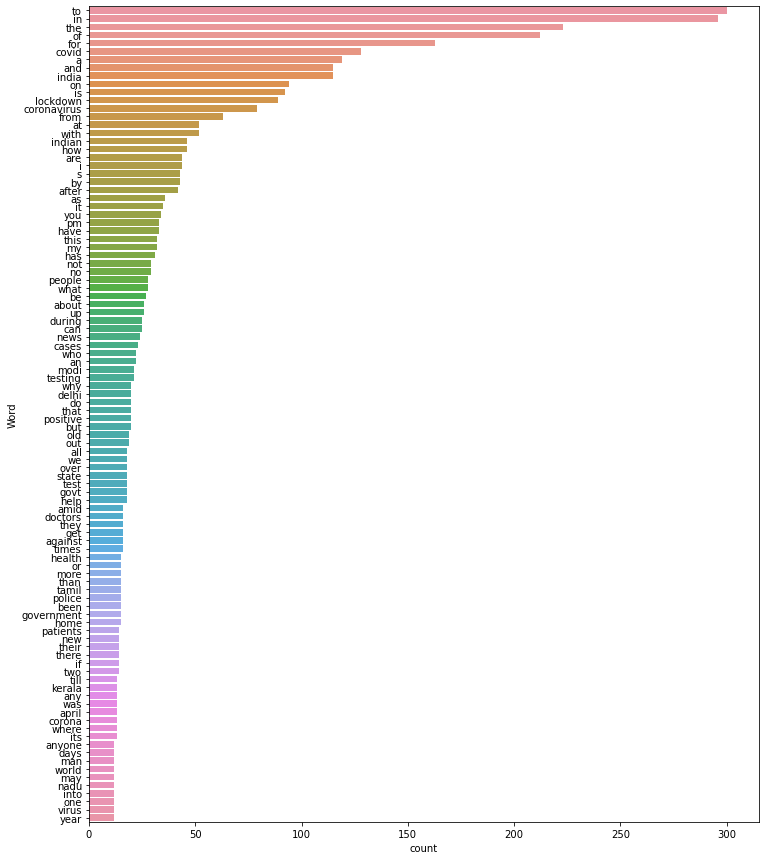

In [34]:
def freq_words(x, terms = 30): 
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
    d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()
  
    # print 100 most frequent words 
freq_words(df['feature_combine'], 100)

### ASSIGNING THE FEATURES AND TARGETS

In [35]:
features = df['feature_combine']
target = df['flair']


# NAIVE BAYES CLASSIFIER

## What I Did?
I have built a Naive Bayes classifier.In this I have made a pipeline which is performing fuctions such as Vectorization,as well as we have used multibninomial mode of naive bayes since we have more information to predict not only one.

In [36]:
def nb_classifier(X_train, X_test, Y_train, Y_test):

    from sklearn.naive_bayes import MultinomialNB
    from sklearn.pipeline import Pipeline
    from sklearn.feature_extraction.text import TfidfTransformer

    nb = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                   ('clf', MultinomialNB()),
                  ])
    nb.fit(X_train, Y_train)

    #%%time
    from sklearn.metrics import classification_report
    y_pred = nb.predict(X_test)

    print('accuracy %s' % accuracy_score(y_pred, Y_test))
    print(classification_report(Y_test, y_pred))


### SVM CLASSIFIER

## What I Did?
Here I have built an Linear SVM performing all 3 fuctions that i have performed in above model as this is used in nlp because we cannot directly process on string.

In [57]:
def linear_svm(X_train, X_test, Y_train, Y_test):

    from sklearn.linear_model import SGDClassifier
    from sklearn.pipeline import Pipeline
    from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    import matplotlib.pyplot as plt


    lsm = Pipeline([('vect', TfidfVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=1, max_iter=5, tol=None)),
                   ])
    lsm.fit(X_train, Y_train)



    y_pred = lsm.predict(X_test)

    print('accuracy %s' % accuracy_score(y_pred, Y_test))
    print(classification_report(Y_test, y_pred))

    #confusion matrix between actual and predicted value
    from sklearn.metrics import confusion_matrix
    conf_mat = confusion_matrix(Y_test, y_pred)
    fig, ax = plt.subplots(figsize=(10,10))


    #fig = plt.figure(figsize=(8,6))
    df.groupby('flair').title.count().plot.bar(ylim=0)
    plt.show()


    import seaborn as sns
    sns.heatmap(conf_mat, annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Random Forest

In [52]:
def randomforest(X_train, X_test, Y_train, Y_test):
  
    from sklearn.ensemble import RandomForestClassifier

    ranfor = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', RandomForestClassifier(n_estimators = 1500, random_state = 42)),
                 ])
    ranfor.fit(X_train, Y_train)

    y_pred = ranfor.predict(X_test)

    print('accuracy %s' % accuracy_score(y_pred, Y_test))
    print(classification_report(Y_test, y_pred))

## Logistic Regression

In [53]:
def logisticreg(X_train, X_test, Y_train, Y_test):
    from sklearn.linear_model import LogisticRegression

    logreg = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', LogisticRegression(n_jobs=1, C=1e5)),
                 ])
    logreg.fit(X_train, Y_train)

    y_pred = logreg.predict(X_test)

    print('accuracy %s' % accuracy_score(y_pred, Y_test))
    print(classification_report(Y_test, y_pred))

## Stochastic Gradient Descent

In [54]:
def sgd(X_train, X_test, Y_train, Y_test):

    from sklearn.linear_model import SGDClassifier

    sgd = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-4, random_state=109, max_iter=5, tol=None)),
                   ])
    sgd.fit(X_train, Y_train)


    y_pred = sgd.predict(X_test)

    print('accuracy %s' % accuracy_score(y_pred, Y_test))
    print(classification_report(Y_test, y_pred))

### DEFINING THE TRAIN AND TEST FEATURES AND TARGETS

## what I did here?
Here I have called a function defined above that is naive bayes and linear svm and made a classification report of each.
It is better to know our model holds what accuracy on each flair while processing.

Naive bayes accuracy - 51.7% &&
Linear SVM - 59.8%

In [55]:
def train_test(X,y):
 
    X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size = 0.3,random_state = 42)

    print("Results of Naive Bayes Classifier")
    nb_classifier(X_train, X_test, Y_train, Y_test)
    print("Results of Linear Support Vector Machine")
    linear_svm(X_train, X_test, Y_train, Y_test)
    print("Results of Logistic Regression")
    logisticreg(X_train, X_test, Y_train, Y_test)
    print("Results of SGD")
    sgd(X_train, X_test, Y_train, Y_test)
    print("Results of Random Forest")
    randomforest(X_train, X_test, Y_train, Y_test)
    
    

Flair Detection using Title as Feature
Results of Naive Bayes Classifier
accuracy 0.3922413793103448
                                  precision    recall  f1-score   support

                        AskIndia       0.00      0.00      0.00        33
                Business/Finance       0.00      0.00      0.00         4
                     CAA-NRC-NPR       0.00      0.00      0.00         2
                     Coronavirus       0.39      1.00      0.57        91
                            Food       0.00      0.00      0.00         7
                   Non-Political       0.00      0.00      0.00        38
                     Photography       0.00      0.00      0.00         4
                  Policy/Economy       0.00      0.00      0.00        11
                        Politics       0.00      0.00      0.00        34
                       Scheduled       0.00      0.00      0.00         1
              Science/Technology       0.00      0.00      0.00         3
          

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'prec

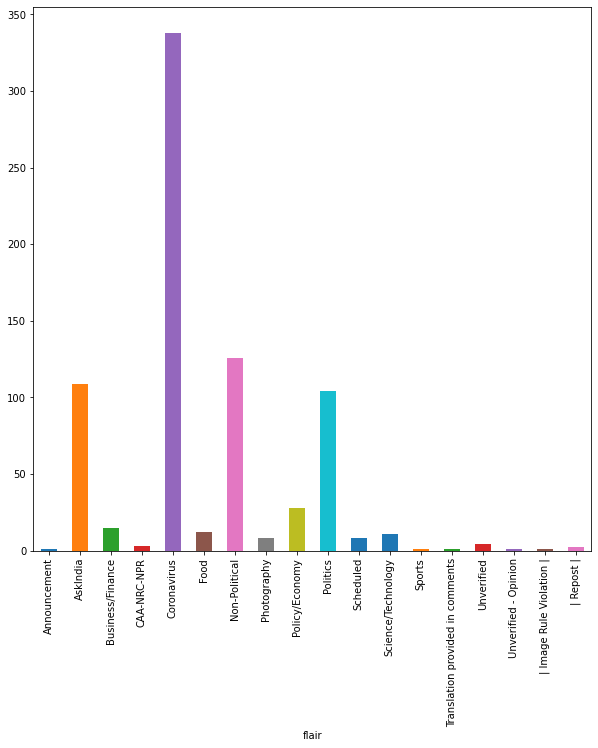

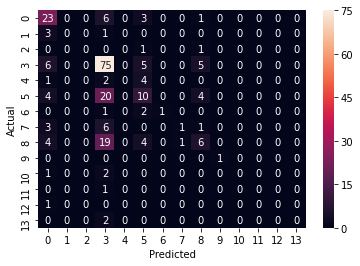

Results of Logistic Regression
accuracy 0.4956896551724138
                                  precision    recall  f1-score   support

                        AskIndia       0.52      0.94      0.67        33
                Business/Finance       0.00      0.00      0.00         4
                     CAA-NRC-NPR       0.00      0.00      0.00         2
                     Coronavirus       0.55      0.75      0.64        91
                            Food       0.00      0.00      0.00         7
                   Non-Political       0.38      0.29      0.33        38
                     Photography       0.00      0.00      0.00         4
                  Policy/Economy       0.00      0.00      0.00        11
                        Politics       0.24      0.12      0.16        34
                       Scheduled       1.00      1.00      1.00         1
              Science/Technology       0.00      0.00      0.00         3
                          Sports       0.00      0.0

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVAN

accuracy 0.4870689655172414
                                  precision    recall  f1-score   support

                        AskIndia       0.51      0.79      0.62        33
                Business/Finance       0.00      0.00      0.00         4
                     CAA-NRC-NPR       0.00      0.00      0.00         2
                     Coronavirus       0.55      0.80      0.65        91
                            Food       0.00      0.00      0.00         7
                   Non-Political       0.33      0.21      0.26        38
                     Photography       0.00      0.00      0.00         4
                  Policy/Economy       0.00      0.00      0.00        11
                        Politics       0.38      0.15      0.21        34
                       Scheduled       1.00      1.00      1.00         1
              Science/Technology       0.00      0.00      0.00         3
                          Sports       0.00      0.00      0.00         1
Translati

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy 0.49137931034482757
                                  precision    recall  f1-score   support

                        AskIndia       0.50      0.91      0.65        33
                Business/Finance       0.00      0.00      0.00         4
                     CAA-NRC-NPR       0.00      0.00      0.00         2
                     Coronavirus       0.52      0.84      0.64        91
                            Food       0.00      0.00      0.00         7
                   Non-Political       0.29      0.16      0.20        38
                     Photography       0.00      0.00      0.00         4
                  Policy/Economy       0.00      0.00      0.00        11
                        Politics       0.33      0.03      0.05        34
                       Scheduled       1.00      1.00      1.00         1
              Science/Technology       0.00      0.00      0.00         3
                          Sports       0.00      0.00      0.00         1
Translat

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'prec

accuracy 0.5043103448275862
                                  precision    recall  f1-score   support

                        AskIndia       0.50      0.70      0.58        33
                Business/Finance       0.00      0.00      0.00         4
                     CAA-NRC-NPR       0.00      0.00      0.00         2
                     Coronavirus       0.56      0.82      0.66        91
                            Food       0.00      0.00      0.00         7
                   Non-Political       0.34      0.26      0.30        38
                     Photography       1.00      0.25      0.40         4
                  Policy/Economy       0.50      0.09      0.15        11
                        Politics       0.33      0.18      0.23        34
                       Scheduled       1.00      1.00      1.00         1
              Science/Technology       0.00      0.00      0.00         3
                          Sports       0.00      0.00      0.00         1
Translati

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


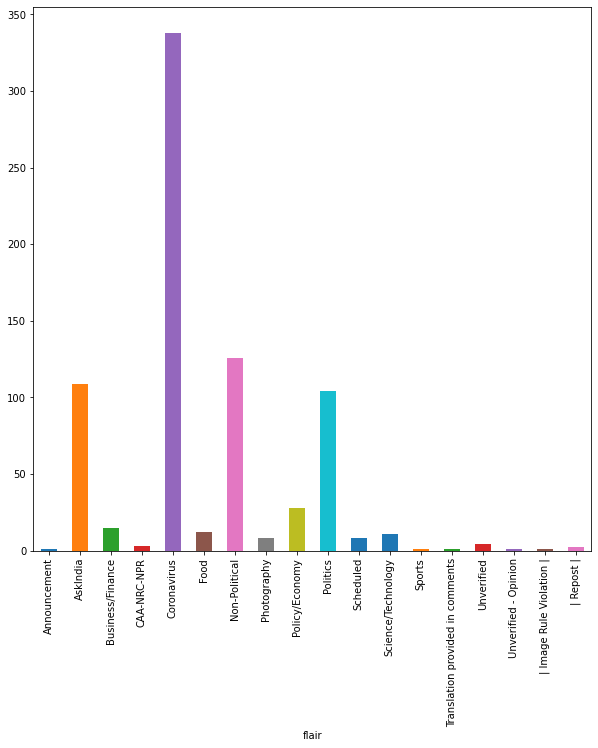

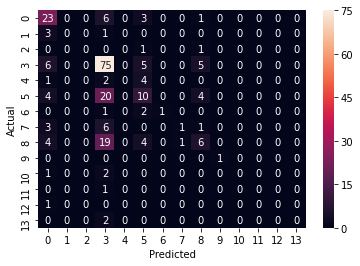

Results of Logistic Regression
accuracy 0.4956896551724138
                                  precision    recall  f1-score   support

                        AskIndia       0.52      0.94      0.67        33
                Business/Finance       0.00      0.00      0.00         4
                     CAA-NRC-NPR       0.00      0.00      0.00         2
                     Coronavirus       0.55      0.75      0.64        91
                            Food       0.00      0.00      0.00         7
                   Non-Political       0.38      0.29      0.33        38
                     Photography       0.00      0.00      0.00         4
                  Policy/Economy       0.00      0.00      0.00        11
                        Politics       0.24      0.12      0.16        34
                       Scheduled       1.00      1.00      1.00         1
              Science/Technology       0.00      0.00      0.00         3
                          Sports       0.00      0.0

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVAN

accuracy 0.4870689655172414
                                  precision    recall  f1-score   support

                        AskIndia       0.51      0.79      0.62        33
                Business/Finance       0.00      0.00      0.00         4
                     CAA-NRC-NPR       0.00      0.00      0.00         2
                     Coronavirus       0.55      0.80      0.65        91
                            Food       0.00      0.00      0.00         7
                   Non-Political       0.33      0.21      0.26        38
                     Photography       0.00      0.00      0.00         4
                  Policy/Economy       0.00      0.00      0.00        11
                        Politics       0.38      0.15      0.21        34
                       Scheduled       1.00      1.00      1.00         1
              Science/Technology       0.00      0.00      0.00         3
                          Sports       0.00      0.00      0.00         1
Translati

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy 0.49137931034482757
                                  precision    recall  f1-score   support

                        AskIndia       0.50      0.91      0.65        33
                Business/Finance       0.00      0.00      0.00         4
                     CAA-NRC-NPR       0.00      0.00      0.00         2
                     Coronavirus       0.52      0.84      0.64        91
                            Food       0.00      0.00      0.00         7
                   Non-Political       0.29      0.16      0.20        38
                     Photography       0.00      0.00      0.00         4
                  Policy/Economy       0.00      0.00      0.00        11
                        Politics       0.33      0.03      0.05        34
                       Scheduled       1.00      1.00      1.00         1
              Science/Technology       0.00      0.00      0.00         3
                          Sports       0.00      0.00      0.00         1
Translat

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'prec


                                  precision    recall  f1-score   support

                        AskIndia       0.50      0.70      0.58        33
                Business/Finance       0.00      0.00      0.00         4
                     CAA-NRC-NPR       0.00      0.00      0.00         2
                     Coronavirus       0.56      0.82      0.66        91
                            Food       0.00      0.00      0.00         7
                   Non-Political       0.34      0.26      0.30        38
                     Photography       1.00      0.25      0.40         4
                  Policy/Economy       0.50      0.09      0.15        11
                        Politics       0.33      0.18      0.23        34
                       Scheduled       1.00      1.00      1.00         1
              Science/Technology       0.00      0.00      0.00         3
                          Sports       0.00      0.00      0.00         1
Translation provided in comments    

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


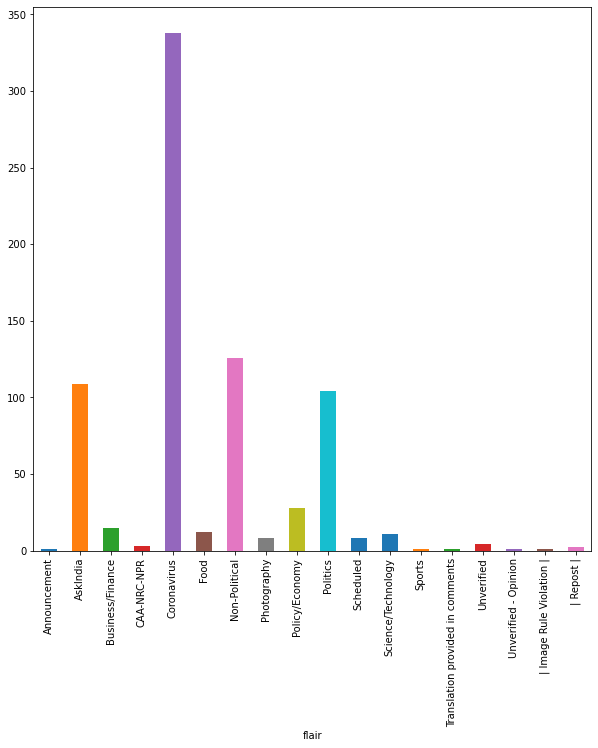

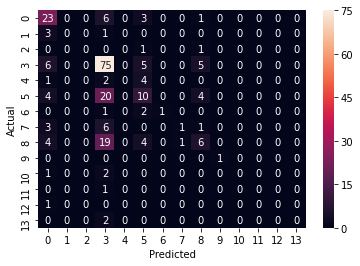

Results of Logistic Regression
accuracy 0.4956896551724138


C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVAN

                                  precision    recall  f1-score   support

                        AskIndia       0.52      0.94      0.67        33
                Business/Finance       0.00      0.00      0.00         4
                     CAA-NRC-NPR       0.00      0.00      0.00         2
                     Coronavirus       0.55      0.75      0.64        91
                            Food       0.00      0.00      0.00         7
                   Non-Political       0.38      0.29      0.33        38
                     Photography       0.00      0.00      0.00         4
                  Policy/Economy       0.00      0.00      0.00        11
                        Politics       0.24      0.12      0.16        34
                       Scheduled       1.00      1.00      1.00         1
              Science/Technology       0.00      0.00      0.00         3
                          Sports       0.00      0.00      0.00         1
Translation provided in comments     

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy 0.49137931034482757
                                  precision    recall  f1-score   support

                        AskIndia       0.50      0.91      0.65        33
                Business/Finance       0.00      0.00      0.00         4
                     CAA-NRC-NPR       0.00      0.00      0.00         2
                     Coronavirus       0.52      0.84      0.64        91
                            Food       0.00      0.00      0.00         7
                   Non-Political       0.29      0.16      0.20        38
                     Photography       0.00      0.00      0.00         4
                  Policy/Economy       0.00      0.00      0.00        11
                        Politics       0.33      0.03      0.05        34
                       Scheduled       1.00      1.00      1.00         1
              Science/Technology       0.00      0.00      0.00         3
                          Sports       0.00      0.00      0.00         1
Translat

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'prec

accuracy 0.5043103448275862
                                  precision    recall  f1-score   support

                        AskIndia       0.50      0.70      0.58        33
                Business/Finance       0.00      0.00      0.00         4
                     CAA-NRC-NPR       0.00      0.00      0.00         2
                     Coronavirus       0.56      0.82      0.66        91
                            Food       0.00      0.00      0.00         7
                   Non-Political       0.34      0.26      0.30        38
                     Photography       1.00      0.25      0.40         4
                  Policy/Economy       0.50      0.09      0.15        11
                        Politics       0.33      0.18      0.23        34
                       Scheduled       1.00      1.00      1.00         1
              Science/Technology       0.00      0.00      0.00         3
                          Sports       0.00      0.00      0.00         1
Translati

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


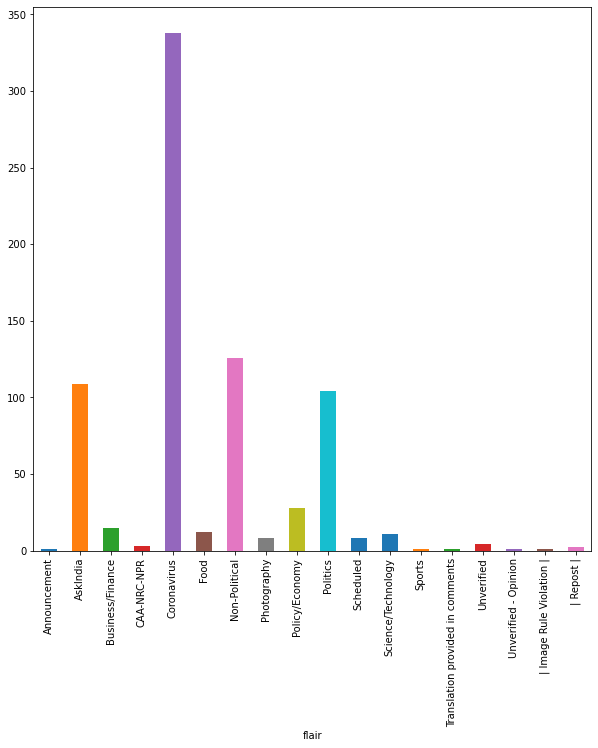

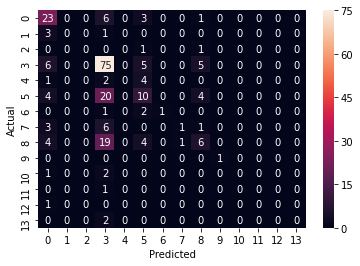

Results of Logistic Regression
accuracy 0.4956896551724138
                                  precision    recall  f1-score   support

                        AskIndia       0.52      0.94      0.67        33
                Business/Finance       0.00      0.00      0.00         4
                     CAA-NRC-NPR       0.00      0.00      0.00         2
                     Coronavirus       0.55      0.75      0.64        91
                            Food       0.00      0.00      0.00         7
                   Non-Political       0.38      0.29      0.33        38
                     Photography       0.00      0.00      0.00         4
                  Policy/Economy       0.00      0.00      0.00        11
                        Politics       0.24      0.12      0.16        34
                       Scheduled       1.00      1.00      1.00         1
              Science/Technology       0.00      0.00      0.00         3
                          Sports       0.00      0.0

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVAN

accuracy 0.4870689655172414
                                  precision    recall  f1-score   support

                        AskIndia       0.51      0.79      0.62        33
                Business/Finance       0.00      0.00      0.00         4
                     CAA-NRC-NPR       0.00      0.00      0.00         2
                     Coronavirus       0.55      0.80      0.65        91
                            Food       0.00      0.00      0.00         7
                   Non-Political       0.33      0.21      0.26        38
                     Photography       0.00      0.00      0.00         4
                  Policy/Economy       0.00      0.00      0.00        11
                        Politics       0.38      0.15      0.21        34
                       Scheduled       1.00      1.00      1.00         1
              Science/Technology       0.00      0.00      0.00         3
                          Sports       0.00      0.00      0.00         1
Translati

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy 0.49137931034482757
                                  precision    recall  f1-score   support

                        AskIndia       0.50      0.91      0.65        33
                Business/Finance       0.00      0.00      0.00         4
                     CAA-NRC-NPR       0.00      0.00      0.00         2
                     Coronavirus       0.52      0.84      0.64        91
                            Food       0.00      0.00      0.00         7
                   Non-Political       0.29      0.16      0.20        38
                     Photography       0.00      0.00      0.00         4
                  Policy/Economy       0.00      0.00      0.00        11
                        Politics       0.33      0.03      0.05        34
                       Scheduled       1.00      1.00      1.00         1
              Science/Technology       0.00      0.00      0.00         3
                          Sports       0.00      0.00      0.00         1
Translat

C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AVANISH SINGHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [56]:
X = df.title
Y = df.body
Z = df.url
features = df['feature_combine']
target = df['flair']

print("Flair Detection using Title as Feature")
train_test(X,target)
print("Flair Detection using Body as Feature")
train_test(Y,target)
print("Flair Detection using URL as Feature")
train_test(Z,target)
print("Flair Detection using Title+URL as Feature")
train_test(features,target)

### SAVING THE MODEL USING PICKLE

### finally I have Saved my model with the Linear svm classifier as it holds better accuracy 

In [59]:
import pickle

#Pkl_Filename = "finalmodel.pkl"  

#with open(Pkl_Filename, 'wb') as file:  
 #   pickle.dump(sgd, file)

In [62]:
filename = '../Model/finaliz_model.sav'
pickle.dump(linear_svm, open(filename, 'wb'))